# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple multivariate regression analyses using `statsmodels`;
- Use propensity score matching to estimate treatment effects;

---

## Important Dates

- Homework release: Fri 15 Nov 2024
- **Homework due**: Fri 29 Nov 2024, 23:59
- Grade release: Mon 09 Dec 2024

---

##  Some rules

1. You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.
2. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
3. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
4. In continuation to the previous point on additional library, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:

Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
Some of the TAs on this course literally published many works on detecting machine-generated text.

Here LLM includes but not limited to chatbots like ChatGPT, coding assistants like Copilot. Do not even use them to prettify your code or correct English. If you are caught using LLMs, you will be reported to the instructor and subject to the consequences. 


---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing ( 20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: Propensity Score Matching (10 points)

## Context

Within EPFL's master program, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in Switzerland !

Your mentor at the company Tim, has explained to you that the company is interested in a pricing model for used cars. 

- Tim: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Tim: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla-clean.csv` and `Task1-2.ToyotaCorolla-raw.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3
- `Task4.ToyotaCorolla_discount_sales` for Part 4

You should not use any other data source for this homework.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [1450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [1451]:
file_path = './data/Task1-2.ToyotaCorolla-raw.csv'

with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

lines[32] = lines[32].replace('15,646.9', '15646.9')

corrected_file_path = './data/Task1-2.ToyotaCorolla-corrected.csv'
with open(corrected_file_path, 'w', encoding='utf-8') as f:
    f.writelines(lines)

raw_CSV = pd.read_csv(corrected_file_path)
raw_CSV.head(5)

#The issue arises because the comma in 15,646.9 is interpreted as a delimiter, which causes pandas to 
# #misinterpret the structure of the row (12 fields instead of 11).

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [1452]:
print("Check if there are NaN values in the Dataframe :")
raw_CSV[raw_CSV.isnull().any(axis=1)].head()

Check if there are NaN values in the Dataframe :


,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
906,8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1453]:
lines[907] = lines[907].replace(';', ',')
corrected_file_path = './data/Task1-2.ToyotaCorolla-corrected.csv'
with open(corrected_file_path, 'w', encoding='utf-8') as f:
    f.writelines(lines)

raw_CSV = pd.read_csv(corrected_file_path)

In [1454]:
raw_CSV.iloc[907]

Price         7731.0
Age               65
Mileage      58829.0
FuelType      Petrol
HP               110
MetColor           0
Automatic          0
CC              1600
Doors              3
Weight          1050
Currency         CHF
Name: 907, dtype: object

**1.3 (4 pts): Compute the mean, median of the `Price` column.**

1. Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.
2. After computing the mean and median, do you think they are reasonable? If not, what could be the reason for this? 
  
Hint: Is all values in the `Price` column numerical?


In [1455]:
# When attempting to compute the mean and median of the Price column, we encountered one primary issue:

# - Non-numerical values: Some cells in the Price column contain non-numerical characters, such as the £ sign 
#   or commas used for thousand separators. These prevent the column from being treated as numeric. 
#   To resolve this, we removed the £ sign and replaced the commas used for thousand separation with nothing.

In [1456]:
def clean_price(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        value = value.replace('£', '')    
    return value

In [1457]:
cleaned_prices = raw_CSV['Price'].apply(clean_price)
cleaned_prices = pd.to_numeric(cleaned_prices, errors='coerce')

In [1458]:
# Compute the mean of the Price column
mean_price = cleaned_prices.mean()
print(f"Mean of the Price column: {mean_price}")

# Compute the median of the Price column
median_price = cleaned_prices.median()
print(f"Median of the Price column: {median_price}")

Mean of the Price column: 10715727218892.951
Median of the Price column: 8595.0


In [1459]:
# After computing the mean and median, we notice that the mean is not reasonable. 
# The reason is the formatting in a specific row.

# In row 35 of the CSV, the Price value contains two commas—one used for thousand separation and another for decimals.

# To address these issues comprehensively, we implemented a custom cleaning function. 
# The function:

# - Removes the £ sign if present.
# - Replaces the first comma with nothing (for thousand separation).
# - Replaces the second comma with a period (to correctly represent decimals).

# By applying this function to the Price column, we successfully converted all values to numeric 
# and were able to compute the mean and median.


In [1460]:
def final_clean_price(value):
    # First, replace commas with nothing
    if isinstance(value, str):
        # Check if the value contains more than one comma
        commas = value.count(',')
        value = value.replace('£', '')
        
        if commas > 1:
            # If there are more than one comma, replace the first comma with nothing and the second with a point
            value = value.replace(',', '', 1)  # First comma removed
            value = value.replace(',', '.', 1)  # Second comma turned into a point
        
        else:
            # If only one comma, just remove it
            value = value.replace(',', '')
        
    return value

In [1461]:
raw_CSV['Price'] = raw_CSV['Price'].apply(final_clean_price)

In [1462]:
raw_CSV['Price'] = pd.to_numeric(raw_CSV['Price'], errors='coerce')
# Check if there are any rows with invalid price data
invalid_rows = raw_CSV[raw_CSV['Price'].isna()]
print("Rows with invalid Price data:")
print(invalid_rows)

Rows with invalid Price data:
Empty DataFrame
Columns: [Price, Age, Mileage, FuelType, HP, MetColor, Automatic, CC, Doors, Weight, Currency]
Index: []


In [1463]:
# Compute the mean of the Price column
mean_price = raw_CSV['Price'].mean()
print(f"Mean of the Price column: {mean_price}")

# Compute the median of the Price column
median_price = raw_CSV['Price'].median()
print(f"Median of the Price column: {median_price}")

Mean of the Price column: 9439.505809951286
Median of the Price column: 8595.0


In [1464]:
#These values make much more sense.

**1.4 (4 pts): Convert Units**

From now on, we will work with the cleaned data `Task1-2.ToyotaCorolla-clean.csv`. Read it into a DataFrame.

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to CHF and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 CHF
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in EUR or GBP to CHF, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [1465]:
clean_CSV = pd.read_csv('./data/Task1-2.ToyotaCorolla-clean.csv')
clean_CSV.head()

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF


In [1466]:
def convert_price(row):
    if row['Currency'] == 'EURO':
        return round(row['Price'] / 1.05)
    elif row['Currency'] == 'GBP':
        return round(row['Price'] * 1.15)
    else:
        return row['Price']
        
def convert_mileage(row):
    if row['Currency'] == 'GBP':
        return round(row['Mileage'] * 1.61)
    else:
        return row['Mileage']

In [1467]:
clean_CSV['Price'] = clean_CSV.apply(convert_price, axis=1)
clean_CSV['Mileage'] = clean_CSV.apply(convert_mileage, axis=1)
clean_CSV.head()

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,12857.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF


In [1468]:
clean_CSV.drop(columns=['Currency'], inplace=True)
clean_CSV.head()

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12857.0,23,46986.0,Diesel,90,1,0,2000,3,1165
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170


In [1469]:
# Compute the mean of the Price column
mean_price = clean_CSV['Price'].mean()
print(f"Mean of the Price column: {mean_price}")

# Compute the median of the Price column
median_price = clean_CSV['Price'].median()
print(f"Median of the Price column: {median_price}")

# Compute the min of the Price column
min_price = clean_CSV['Price'].min()
print(f"Min of the Price column: {min_price}")

# Compute the max of the Price column
max_price = clean_CSV['Price'].max()
print(f"Max of the Price column: {max_price}")

Mean of the Price column: 9423.536211699164
Median of the Price column: 8595.0
Min of the Price column: 3758.0
Max of the Price column: 28074.0


In [1470]:
# Compute the mean of the Mileage column
mean_distance = clean_CSV['Mileage'].mean()
print(f"Mean of the Mileage column: {mean_distance}")

# Compute the median of the Mileage column
median_distance = clean_CSV['Mileage'].median()
print(f"Median of the Mileage column: {median_distance}")

# Compute the min of the Mileage column
min_distance = clean_CSV['Mileage'].min()
print(f"Min of the Mileage column: {min_distance}")

# Compute the max of the Mileage column
max_distance = clean_CSV['Mileage'].max()
print(f"Max of the Mileage column: {max_distance}")

Mean of the Mileage column: 68533.25974930362
Median of the Mileage column: 63389.5
Min of the Mileage column: 1.0
Max of the Mileage column: 243000.0


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [1471]:
average_price_by_fuel = clean_CSV.groupby('FuelType')['Price'].mean()
print("Average price for each fuel type:")
print(average_price_by_fuel)

Average price for each fuel type:
FuelType
CNG       8383.235294
Diesel    9878.619355
Petrol    9381.722310
Name: Price, dtype: float64


In [1472]:
#The Diesel has the highest average price.

In [1473]:
average_price_by_doors = clean_CSV.groupby('Doors')['Price'].mean()
print("Average price for each different nubers of doors:")
print(average_price_by_doors)

Average price for each different nubers of doors:
Doors
2     6997.500000
3     8898.673633
4     8604.384058
5    10082.823442
Name: Price, dtype: float64


In [1474]:
# Five numbers of doors has the highest average price.

**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

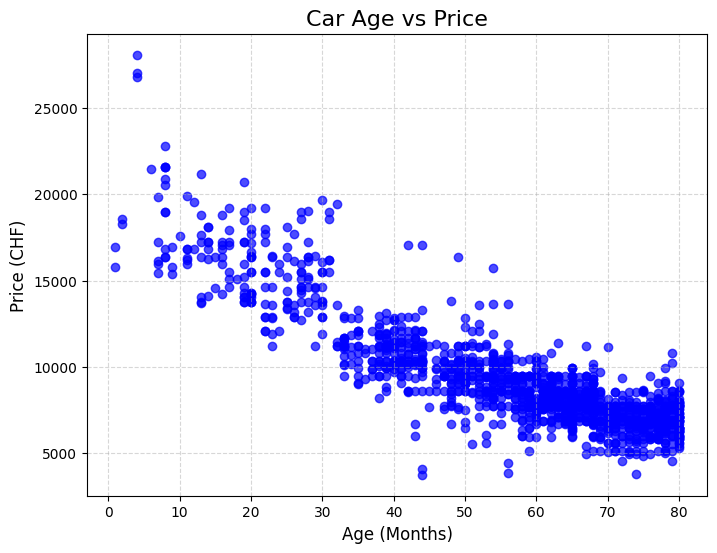

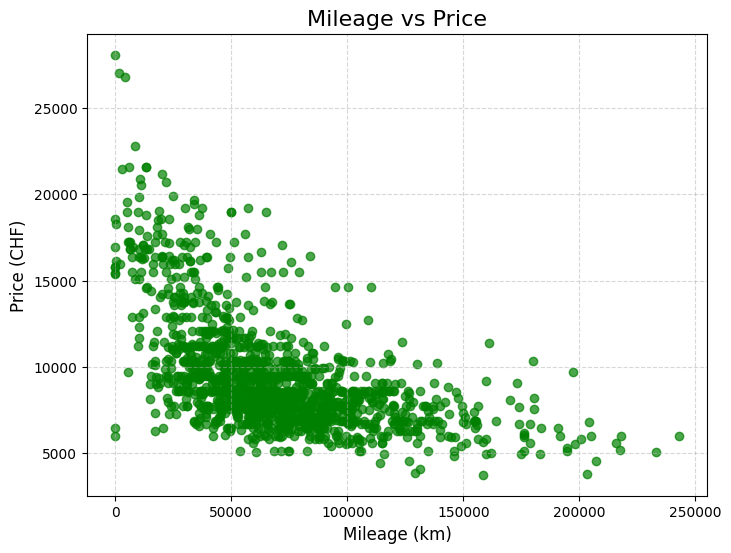

In [1475]:
# Scatter plot: Car Age vs Price
plt.figure(figsize=(8, 6))
plt.scatter(clean_CSV['Age'], clean_CSV['Price'], color='blue', alpha=0.7)
plt.title("Car Age vs Price", fontsize=16)
plt.xlabel("Age (Months)", fontsize=12)
plt.ylabel("Price (CHF)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Scatter plot: Mileage vs Price
plt.figure(figsize=(8, 6))
plt.scatter(clean_CSV['Mileage'], clean_CSV['Price'], color='green', alpha=0.7)
plt.title("Mileage vs Price", fontsize=16)
plt.xlabel("Mileage (km)", fontsize=12)
plt.ylabel("Price (CHF)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [1476]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mileage_scaled = scaler.fit_transform(clean_CSV[['Mileage']])
price_scaled = scaler.fit_transform(clean_CSV[['Price']])

# Calculate Pearson correlation
pearson_corr = np.corrcoef(mileage_scaled.T, price_scaled.T)[0, 1]

# Calculate Spearman correlation
mileage_rank = clean_CSV['Mileage'].rank()
price_rank = clean_CSV['Price'].rank()
spearman_corr = np.corrcoef(mileage_rank, price_rank)[0, 1]

# Print results
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

Pearson Correlation: -0.5634
Spearman Correlation: -0.6054



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

In [1477]:
# The Spearman Correlation (-0.6054) is higher in magnitude compared to the Pearson Correlation (-0.5634).
# This result aligns with expectations.
# Pearson Correlation measures the linear relationship between variables. 
# Due to the non-linear relationship between mileage and price, the Pearson value is weak.
# Spearman correlation measures the monotonic relationship between variables. 
# Since the relationship between mileage and price is more monotonic than linear, we have this higher magnitude.

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building machine learning models, how to asses performance is crucial. Hence we first implement some helper functions to asses the performance of our model. We can use these later throughout the exercise.

Implement the `accuracy` , `precision`, `recall` and `f1_score` functions with the following requirements:

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

Compare the results with the implementation in `sklearn` and see if they match.

In [1478]:
# TODO

# Compute the confusion matrix
def confusion_matrix(true_labels, predicted_labels):

    TP = np.sum(np.logical_and(predicted_labels==1, true_labels==1))
    FN = np.sum(np.logical_and(predicted_labels==0, true_labels==1))
    FP = np.sum(np.logical_and(predicted_labels==1, true_labels==0))
    TN = np.sum(np.logical_and(predicted_labels==0, true_labels==0))
    
    return np.asarray([[TP, FP],
                       [FN, TN]])

# Define the metrics

# Accuracy = True Positive/True Positive + False Positive
def accuracy(true_labels, predicted_labels):

    return np.sum(true_labels == predicted_labels) / len(true_labels)

# Precision = True Positive/True Positive + False Positive
def precision(true_labels, predicted_labels):

    [[TP, FP],[FN, TN]] = confusion_matrix(true_labels, predicted_labels)

    if TP + FP == 0:
        return 0
    else:
        return TP/(TP+FP)

# Recall = True Positive/True Positive + False Negative
def recall(true_labels, predicted_labels):
    
    [[TP, FP],[FN, TN]] = confusion_matrix(true_labels, predicted_labels)

    if TP + FN == 0:
        return 0
    else:
        return TP/(TP+FN)

# F1_Score: Harmonic mean of precision and recall
def F1_score_(true_labels, predicted_labels):

    r = recall(true_labels, predicted_labels)
    p = precision(true_labels, predicted_labels)
    return 2*r*p/(p+r)

In [1479]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

true_test = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_test = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

print(f"Accuracy (sklearn): {accuracy_score(true_test, predicted_test)}")
print(f"Accuracy (hand-made): {accuracy(true_test, predicted_test)}")
print(f"Precision(sklearn): {precision_score(true_test, predicted_test)}")
print(f"Precision (hand-made): {precision(true_test, predicted_test)}")
print(f"Recall (sklearn): {recall_score(true_test, predicted_test)}")
print(f"Recall (hand-made): {recall(true_test, predicted_test)}")
print(f"F1_score (sklearn): {f1_score(true_test, predicted_test)}")
print(f"F1_score(hand-made): {F1_score_(true_test, predicted_test)}")

Accuracy (sklearn): 0.7
Accuracy (hand-made): 0.7
Precision(sklearn): 0.6666666666666666
Precision (hand-made): 0.6666666666666666
Recall (sklearn): 0.8
Recall (hand-made): 0.8
F1_score (sklearn): 0.7272727272727273
F1_score(hand-made): 0.7272727272727272



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [1480]:
# One-hot encoding with drop_first to avoid multicollinearity
clean_CSV_encoded = pd.get_dummies(clean_CSV,columns=['Doors', 'FuelType'], drop_first=True)
print(f"Number of columns after one-hot encoding: {clean_CSV_encoded.shape[1]}")

clean_CSV_encoded.head()

Number of columns after one-hot encoding: 13


,Price,Age,Mileage,HP,MetColor,Automatic,CC,Weight,Doors_3,Doors_4,Doors_5,FuelType_Diesel,FuelType_Petrol
0,12857.0,23,46986.0,90,1,0,2000,1165,True,False,False,True,False
1,11878.0,23,72937.0,90,1,0,2000,1165,True,False,False,True,False
2,12050.0,24,41711.0,90,1,0,2000,1165,True,False,False,True,False
3,12914.0,26,48000.0,90,0,0,2000,1165,True,False,False,True,False
4,11878.0,30,38500.0,90,0,0,2000,1170,True,False,False,True,False


B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [1481]:
# TODO
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = clean_CSV_encoded.drop(columns=['Price'])
y = clean_CSV_encoded['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in each set
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the test set: {len(X_test)}")

Number of samples in the training set: 1148
Number of samples in the test set: 288


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

In [1482]:
# The separation train-validation-test is used when adjusting or optimizing hyperparameters of a model. 
# Additionally, the data set size is rather limited.
# We can use cross-validation on the entire train set to evaluate performance during training.

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [1483]:
# TODO
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Add a constant column to the standardized features
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled,has_constant="add")

# Print the mean and standard deviation of the standardized training set
print(f"Average of training set (after standardization): \n{X_train_scaled.mean(axis=0)}")
print(f"Standard deviation of training set (after standardization): \n{X_train_scaled.std(axis=0)}")

Average of training set (after standardization): 
const              1.000000e+00
Age                1.485455e-16
Mileage           -1.485455e-16
HP                 3.868373e-17
MetColor          -7.736746e-17
Automatic          4.642047e-18
CC                -2.963174e-16
Weight            -6.854757e-16
Doors_3           -5.570457e-17
Doors_4           -1.315247e-17
Doors_5           -8.665155e-17
FuelType_Diesel    1.005777e-17
FuelType_Petrol    2.321024e-17
dtype: float64
Standard deviation of training set (after standardization): 
const              0.000000
Age                1.000436
Mileage            1.000436
HP                 1.000436
MetColor           1.000436
Automatic          1.000436
CC                 1.000436
Weight             1.000436
Doors_3            1.000436
Doors_4            1.000436
Doors_5            1.000436
FuelType_Diesel    1.000436
FuelType_Petrol    1.000436
dtype: float64


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

In [1484]:
# No, we should split the data into train-test sets, and then standardize each element separately. 
# Indeed, otherwise information from the test set would interfere with the training step for the standardization. 
# This is what is called **data leakage**. 
# This leads to overfitting and estimations that are too optimistic.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train and evaluate a linear regression model using the `statsmodels` library, complete the following steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [1485]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train_scaled)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     536.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:17:28   Log-Likelihood:                -9803.5
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1135   BIC:                         1.970e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9441.4983     36.725    2

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [1486]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict prices on test dataset
y_test_pred=res.predict(X_test_scaled)

# Compute RMSE and relative RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
relative_rmse = round(rmse / y_test.mean() * 100, 2)

# Print RMSE
print(f'Root Mean Squared Error: {round(rmse)}')
print(f'Root Mean Squared Error relative to the average car price of the test set: {relative_rmse: .2f}%')

Root Mean Squared Error: 1434
Root Mean Squared Error relative to the average car price of the test set:  15.34%


In [1487]:
# The RMSE tells us that, on average, the predictions made by the model deviate by 1434 CHF from the true car prices. 
# It corresponds on average to a deviation of 15%, which indicates that the predictions are relatively accurate, 
# with respect to the actual prices of the cars in the dataset.

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [1488]:
#Compute the r2 score
r2 = r2_score(y_test, y_test_pred)
print(f'R-squared: {r2}')

R-squared: 0.8122727616953435


In [1489]:
# With an R-square score of 81%, we have that 81% of the variance in car price is explained by the model, 
# which is a suitable explanation power, while 19% of the variance is due to omitted variables or other biases.
# This value is ~4% less than the R squared value found for training. Our guess is that is might 
# be due to the small test set size, otherwise the value should converge to the one found for the training.

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [1490]:
print(f"The features that are statiscally significant are:")
res.pvalues[res.pvalues<0.05]

The features that are statiscally significant are:


const               0.000000e+00
Age                5.468995e-205
Mileage             7.284949e-21
HP                  5.074384e-07
CC                  1.942910e-05
Weight              1.004413e-47
FuelType_Diesel     9.362914e-03
FuelType_Petrol     4.777384e-04
dtype: float64

In [1491]:
#The features shown above are the only significant features at a 5% significance level. 
#For the remaining features, it is not possible to reject the null hypothesis that they do not have 
# an influence on car price

5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

In [1492]:
sorted_coeffs = res.params.abs().sort_values(ascending=False)
    
# Extract the two highest coefficients (keeping the sign)
top_features = sorted_coeffs.head(5)
    
# Get the corresponding features from the model's coefficients
top_coeffs= res.params[top_features.index]

print(top_coeffs)

const      9441.498258
Age       -1971.973191
Weight     1152.956431
Mileage    -503.558069
CC         -477.043150
dtype: float64


In [1493]:
# We can see here that the two features with the highest coefficients  (disregaring the constant term)  
# are the Age and Weight.
# Age is negative, which implies that an increase in Age will cause a decrease in the price,
# while an increase in Weight will cause an increase in Price.
# This totally makes sense as the value of a car depreciates through the years,
# whereas bigger cars tend to have more features and require more resources to produce, 
# leading to a higher price.

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

In [1494]:
# There are many factors that have an influence on the price of a car, here are a few examples: 
# - Options available (AC, GPS...)
# - Maintenance of the vehicle
# - Accident history


**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Tim to discuss this issue. Indeed, Tim suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

In [1495]:
# People usually look for high Horse Power or a high CC, but not for a heavy car. Nonetheless, having a bigger CC, 
# leads, in most cases, to a higher weight. A similar logic can be applied for the Horse Power. 
# Another feature that is not present but could fit in this explanation is the space in the vehicle, 
# especially for the trunk.

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.
  

In [1496]:
# Add the inverse mileage term to the training 
X_train["InverseMileage"]=X_train["Mileage"].apply(lambda x: 1/x)

#Standardize the new column
scaler= StandardScaler()
scaled_features = scaler.fit_transform(X_train.values)
X_scaled = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
X_scaled=sm.add_constant(X_scaled)

#Fit the model
mod = sm.OLS(y_train,X_scaled).fit()
print(mod.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     496.1
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:17:28   Log-Likelihood:                -9801.7
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1134   BIC:                         1.970e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9441.4983     36.685    2

In [1497]:

# Extract the coefficient and the pvaluefor the inverse mileage term
inverse_mileage_coefficient = mod.params['InverseMileage']
inverse_mileage_pvalue = mod.pvalues['InverseMileage']
print(f"Coefficient for Inverse Mileage: {inverse_mileage_coefficient}\nP-value for Inverse Mileage: {inverse_mileage_pvalue}")

Coefficient for Inverse Mileage: -70.14934252428094
P-value for Inverse Mileage: 0.06241848163967786


In [1498]:
#The Adjusted R-Squared accounts for the number of predictors, providing a more reliable measure of model fit. 
#R-squared will always increase or stay the same when more predictors are added, even if 
#those predictors don't improve the model significantly.
#Here, the adj R-quared is slightly better, which shows that adding the inverse mileage gives 
#a bit more information to the model. It is nonetheless very subtle.

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Tim is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [1499]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   sold_within_3_months  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  



**3.1 (2 pts): Preprocess the Data**
1. （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [1500]:
sold_within_3_months_counts = data_df['sold_within_3_months'].value_counts()
print(f"{sold_within_3_months_counts[1]} cars were sold within the first 3 months and {sold_within_3_months_counts[0]} were not.")

880 cars were sold within the first 3 months and 556 were not.


2. (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [1501]:
data_df_onehot = pd.get_dummies(data_df, dtype=np.int64) 
print(data_df_onehot.head())

# Check if there are any missing values for completeness, there are none.
len(data_df_onehot[data_df_onehot.isna().any(axis=1)])

   Price  Age     KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986  90         1          0  2000      3    1165   
1  13750   23  72937  90         1          0  2000      3    1165   
2  13950   24  41711  90         1          0  2000      3    1165   
3  14950   26  48000  90         0          0  2000      3    1165   
4  13750   30  38500  90         0          0  2000      3    1170   

   sold_within_3_months  FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0                     0             0                1                0  
1                     0             0                1                0  
2                     0             0                1                0  
3                     0             0                1                0  
4                     0             0                1                0  


0

**3.2 (20 pts): Logistic Regression Model**

1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [1502]:
X = data_df_onehot.drop(columns=['sold_within_3_months'])
y = data_df_onehot['sold_within_3_months']
print("X:")
print(X.head())
print("\ny:")
print(y.head())

X:
   Price  Age     KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986  90         1          0  2000      3    1165   
1  13750   23  72937  90         1          0  2000      3    1165   
2  13950   24  41711  90         1          0  2000      3    1165   
3  14950   26  48000  90         0          0  2000      3    1165   
4  13750   30  38500  90         0          0  2000      3    1170   

   FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0             0                1                0  
1             0                1                0  
2             0                1                0  
3             0                1                0  
4             0                1                0  

y:
0    0
1    0
2    0
3    0
4    0
Name: sold_within_3_months, dtype: int64


2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [1503]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [1504]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

X_train_scaled_const = sm.add_constant(X_train_scaled)  
X_test_scaled_const = sm.add_constant(X_test_scaled, has_constant='add')
# "has_constant" included because there is a column with zero variance but we still want to add

4. (2 pts) Fit a logistic regression model on the training dataset.

In [1505]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='lbfgs') # Limited-memory Broyden–Fletcher–Goldfarb–Shanno
LR_model.fit(X_train_scaled_const, y_train)

LogisticRegression()

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [1506]:
from sklearn.metrics import accuracy_score
predictions = LR_model.predict(X_test_scaled_const)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 92.71%


6. (2 pts) Calculate the precision, recall, and F1-score.

In [1507]:
from sklearn.metrics import precision_score,recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1_old = f1_score(y_test, predictions)

print(f"Precision score: {precision*100:.2f}%")
print(f"Recall score: {recall*100:.2f}%")
print(f"F1 Score: {f1_old*100:.2f}%")

Precision score: 92.74%
Recall score: 95.40%
F1 Score: 94.05%



7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly. How should you adjust the threshold for the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

In [1508]:
# The threshold determines the probability cutoff for classifying a sample as positive,
# which in our case is "sold within 3 months". It's default value is 0.5.
# If the goal is to sell the cars quickly because cash is needed right now, then we should
# focus on the cars that are most likely to be sold within the first three months.
# Therefore, the model needs to have higher precision, which would lead to higher confidence
# that the cars predicted as positive would be sold quickly. This might give us less
# volume but more speed in sales.

# To achieve higher precision, we should increase the threshold for the logistic regression
# model, so that there are fewer cars, but they can be sold more rapidly.
# If we lower the threshold, recall would increase: the number of false negatives would
# decrease as more of the "previous negatives" are converted to positives.
# However, precision will decrease: the number of false positives increases.

# To show these effects: 
y_probs = LR_model.predict_proba(X_test_scaled_const)[:, 1] # 1 because we are looking at the cases where it is sold

# Increase threshold
threshold = 0.7
y_pred_high = (y_probs >= threshold).astype(int)
precision_high = precision_score(y_test, y_pred_high)
recall_high = recall_score(y_test, y_pred_high)
print(f"Precision for increased threshold: {precision_high*100:.2f}%")
print(f"Recall for increased threshold: {recall_high*100:.2f}%")

# Decrease threshold
threshold = 0.3
y_pred_low = (y_probs >= threshold).astype(int)
precision_low = precision_score(y_test, y_pred_low)
recall_low = recall_score(y_test, y_pred_low)
print(f"Precision for increased threshold: {precision_low*100:.2f}%")
print(f"Recall for increased threshold: {recall_low*100:.2f}%")

print(f"As expected, when increasing the threshold, the model is stricter. Therefore, the recall = {recall_high} is lower, and the precision = {precision_high} is higher.")
print(f"When decreasing the threshold, the model is more lenient. Therefore, the recall = {recall_low} is higher, but the precision = {precision_low} is lower.")
print("In our case, we want to sell more cars, therfore decrease the threshold is our way to go.")


Precision for increased threshold: 95.24%
Recall for increased threshold: 91.95%
Precision for increased threshold: 86.14%
Recall for increased threshold: 100.00%
As expected, when increasing the threshold, the model is stricter. Therefore, the recall = 0.9195402298850575 is lower, and the precision = 0.9523809523809523 is higher.
When decreasing the threshold, the model is more lenient. Therefore, the recall = 1.0 is higher, but the precision = 0.8613861386138614 is lower.
In our case, we want to sell more cars, therfore decrease the threshold is our way to go.


8. (6 pts) Use binary search to find the optimal threshold that maximizes the F1-score. Implement a binary search algorithm to find the threshold that maximizes the f1-score of the logistic regression model on the training set. The search interval should be between 0 and 1, and the stopping criterion is 10 iterations.  What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

In [1509]:
from sklearn.metrics import f1_score
max_iters = 10
lower_boundary = 0
upper_boundary = 1
best_f1_score = 0
converged = 0
optimal_threshold = 0

for i in range(max_iters):
    threshold = (lower_boundary+upper_boundary)/2
    y_probs_temp = LR_model.predict_proba(X_test_scaled_const)[:, 1]
    y_pred_temp = (y_probs_temp >= threshold).astype(int)
    f1_score_new = f1_score(y_test, y_pred_temp)
    if (f1_score_new > best_f1_score):
        best_f1_score = f1_score_new
        optimal_threshold = threshold
        upper_boundary = upper_boundary - threshold
    elif (f1_score_new < best_f1_score):
        lower_boundary = lower_boundary + threshold
    
print(f"The optimal threshold to maximize our F1 score is: {optimal_threshold:.2f}, giving us an F1 score of: {best_f1_score*100:.2f}%")
diff = abs(f1_old - best_f1_score)*100
print(f"It increases the F1 score by {diff:.2f} percentage points. (Old: {f1_old*100:.2f}%, New: {best_f1_score*100:.2f}%)")


The optimal threshold to maximize our F1 score is: 0.56, giving us an F1 score of: 94.59%
It increases the F1 score by 0.54 percentage points. (Old: 94.05%, New: 94.59%)


**3.3(18 pts) Decision Tree Model**

Use a Decision Tree model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train a Decision Tree Classifier to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility in `DecisionTreeClassifier`.

In [1510]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(X_train_scaled_const, y_train)


DecisionTreeClassifier(random_state=42)

2. (2 pts) Evaluate the model on the test set and report the depth of the tree.

In [1511]:
y_pred_tree_test = tree_class.predict(X_test_scaled_const)
tree_depth = tree_class.get_depth()

accuracy = accuracy_score(y_test, y_pred_tree_test)
precision = precision_score(y_test, y_pred_tree_test)
recall = recall_score(y_test, y_pred_tree_test)
F1_score = f1_score(y_test, y_pred_tree_test)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {F1_score * 100:.2f}%")
print(f"When evaluating on the test set, the depth of the tree is: {tree_depth}.")

Accuracy: 91.32%
Precision: 91.16%
Recall: 94.83%
F1 Score: 92.96%
When evaluating on the test set, the depth of the tree is: 16.


3. (2 pts) Visualize the Decision Tree

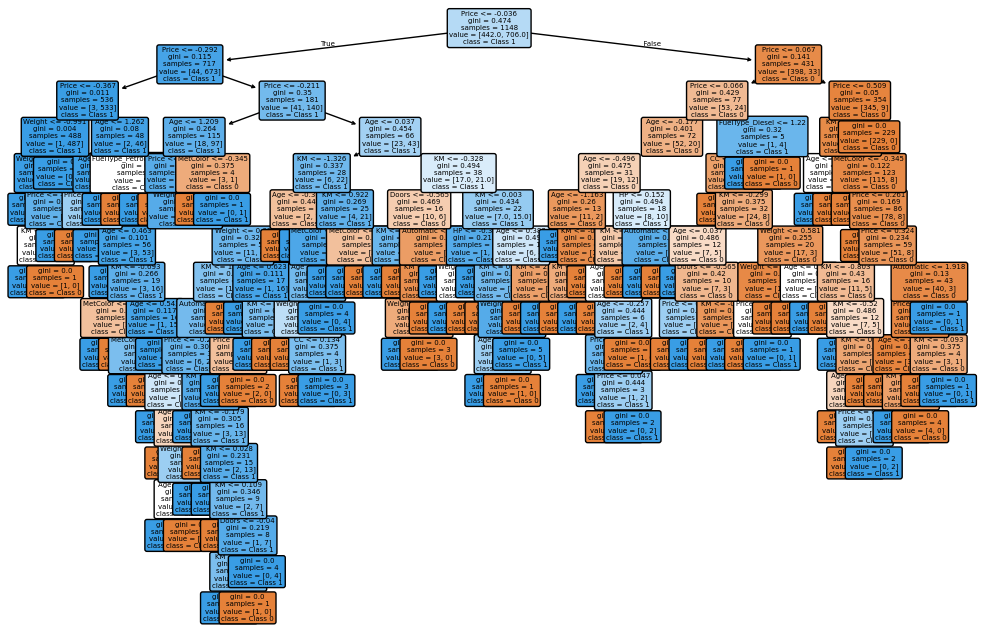

In [1512]:
from sklearn import tree
from sklearn.tree import plot_tree

columns = list(X.columns)
columns.insert(0,"Constant")

plt.figure(figsize=(12, 8))
plot_tree(tree_class,
          filled=True,
          feature_names=columns,
          class_names=['Class 0', 'Class 1'],
          rounded=True,
          fontsize=5)

plt.show()

4. (2 pts) Retrain the Decision Tree Classifier with a maximum depth of 8 and evaluate it on the test set. Compare and explain the results.

In [1513]:
tree_retrained = DecisionTreeClassifier(random_state=42, max_depth=8)
tree_retrained.fit(X_train_scaled_const, y_train)

new_preds = tree_retrained.predict(X_test_scaled_const)
accuracy = accuracy_score(y_test, new_preds)
precision = precision_score(y_test, new_preds)
recall = recall_score(y_test, new_preds)
F1_score = f1_score(y_test, new_preds)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {F1_score * 100:.2f}%")
print(f"The depth of the tree is: {tree_retrained.get_depth()}")

# The two trees have the same accuracy but the first one with a max depth of 16 has 
# around 1 percentage point higher precision and the second one with a max depth of 8 
# has around 1 percentage point higher recall. However, the F1 score of the second tree
# being higher, we can infer that the first tree is overfitting to the training data.

Accuracy: 91.67%
Precision: 91.21%
Recall: 95.40%
F1 Score: 93.26%
The depth of the tree is: 8


5. (6 pts) Train a Decision Tree Classifier for each depth from 1 to D where D is the maximum depth of the Decision Tree Classifier seen in the previous step. Evaluate each model on the test set and plot the accuracy of the models as a function of the depth and find the optimal depth.


[0.93055556 0.93055556 0.92708333 0.92361111 0.91666667 0.92013889
 0.92708333 0.91666667]
The optimal depths seem to be 1 and 2, each having an accuracy of: 93.06%


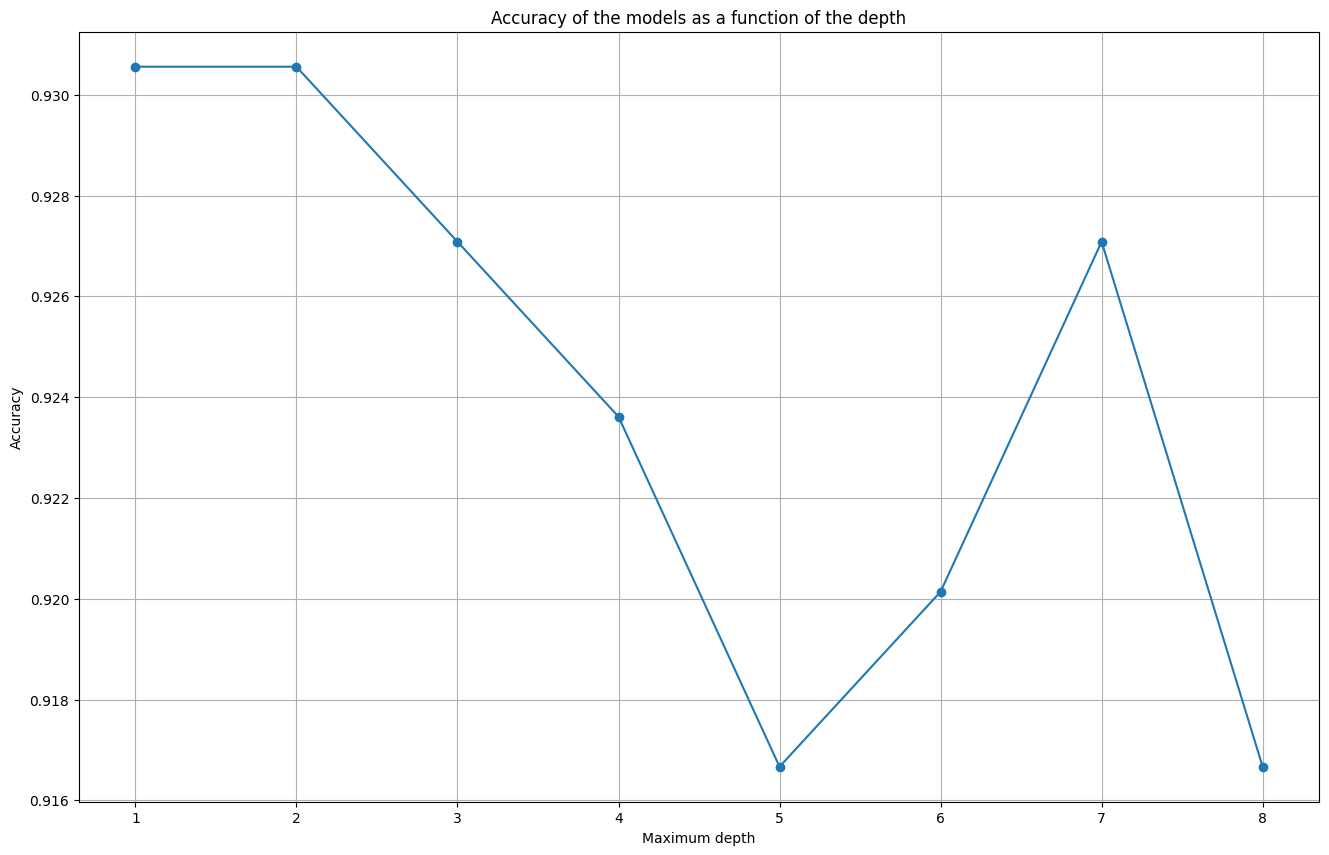

In [1514]:
max_depth = 8
accuracy_tree = np.zeros(max_depth)
for depth in range(1,max_depth+1):
    tree_temp = DecisionTreeClassifier(random_state=42, max_depth=depth)
    tree_temp.fit(X_train_scaled_const, y_train)
    y_tree_temp = tree_temp.predict(X_test_scaled_const)
    accuracy_temp = accuracy_score(y_test, y_tree_temp)
    accuracy_tree[depth-1] = accuracy_temp
print(accuracy_tree)

plt.figure(figsize=(16,10))
plt.plot(range(1, max_depth + 1), accuracy_tree, marker='o')
plt.title("Accuracy of the models as a function of the depth")
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.grid(True)

print(f"The optimal depths seem to be 1 and 2, each having an accuracy of: {100*accuracy_tree[0]:.2f}%")

6. (4 pts) Train a decision tree of depth = 1 , visualize the tree and explain what is the decision rule at the root node.

The decision at the root node is done if the Price is smaller or equal to 10625.00.
The attribute chosen to have the lowest entropy is the second column, therefore the Price. It is standardized and that is why it's value is very small and negative.
If the standardized price is lower or equal to -0.036, then we classify the 'sold in 3 months' as True. We also see that the purest of the nodes/leaves is the root.


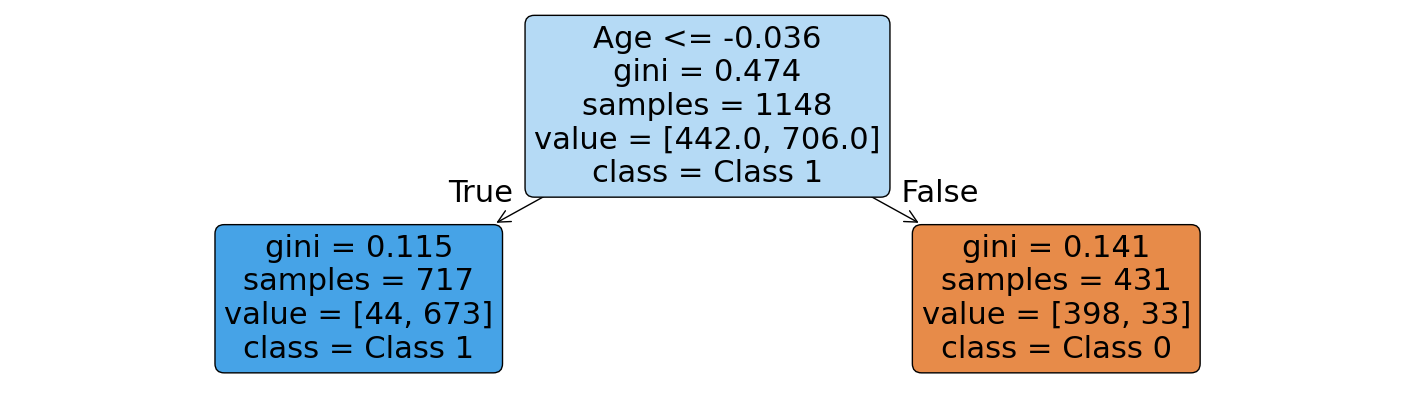

In [1515]:
tree_depth1 = DecisionTreeClassifier(random_state=42, max_depth=1)
tree_depth1.fit(X_train_scaled_const, y_train)
plt.figure(figsize=(18,5))
tree.plot_tree(tree_depth1, filled=True, feature_names=X.columns,class_names=['Class 0', 'Class 1'],rounded=True)
# lower gini score --> less pure node & vice-versa

# We want to find which feature was the determining one, so we get the feature index,
# and use a dummy sample test_X that will be inverse transformed to get the unscaled
# value of the determining feature threshold.
feature_index = tree_depth1.tree_.feature[0]
test_X = np.zeros(len(X_test_scaled_const[0]))
test_X[feature_index] = tree_depth1.tree_.threshold[0]

# We are removing the first constant column that was prepended after the scaler was fit
feature_index -=1
test_X = scaler.inverse_transform(test_X[1:].reshape(1, -1))
feature = X.columns[feature_index]

print(f"The decision at the root node is done if the {feature} is smaller or equal to {test_X[0][feature_index]:.2f}.")

print("The attribute chosen to have the lowest entropy is the second column, therefore the Price. It is standardized and that is why it's value is very small and negative.")
print("If the standardized price is lower or equal to -0.036, then we classify the 'sold in 3 months' as True. We also see that the purest of the nodes/leaves is the root.")

## Part 4 Propensity Score Matching (10 pts)

Your mentor is thrilled with the progress, and he has asked Ivan to put the model into production. Based on the model's prediction, the sales manager Ivan will decide whether to lower the car's price by 5%.

A new quarter has passed, and Ivan has collected updated sales data, which includes the following columns:

- `Price`: The initial price of the car.
- `Pred_Prob`: The predicted probability of the car being sold within the first three months.
- `Applied_Discount`: Whether the discount was applied (Yes=1, No=0).
- `Discounted_Price`: The car's final price, calculated as `Price * 95%` if the discount was applied; otherwise, it's equal to `Price`.
- `Sold_within_3_months`: Whether the car was sold within the first three months (Yes=1, No=0).

Your task is to estimate the causal effect of the discount on sales within the first three months using propensity score matching.

In [1516]:
data_df = pd.read_csv('data/Task4.ToyotaCorolla_discount_sales.csv', index_col=0)
print(data_df.head())

   Price  Pred_Prob  Applied_Discount  Discounted_Price  Sold_within_3_months
0  12750       0.01                 1           11475.0                     1
1  21950       0.00                 1           19755.0                     1
2   9950       0.79                 0            9950.0                     1
3   9930       0.91                 1            8937.0                     0
4   9450       0.97                 0            9450.0                     0


**4.1 (1 pts): How many samples are in the treated group, and how many are in the control group?**

In [1517]:
treated = data_df[data_df["Applied_Discount"] == 1].copy()
control = data_df[data_df["Applied_Discount"] == 0].copy()
treated_count = treated.shape[0]
control_count = control.shape[0]

print(f"Number of samples in the treated group: {treated_count}")
print(f"Number of samples in the control group: {control_count}")

Number of samples in the treated group: 82
Number of samples in the control group: 118



**4.2 (5 pts): Propensity Score Matching**
- The propensity score is the predicted probability of the car being sold within the first three months from the logistic regression model, i.e. `Pred_Prob` column in the `Task4.ToyotaCorolla_discount_sales.csv` file. Create pairs of matched samples as follows:
  - For each treated sample (discount applied), find a control sample (discount not applied) with a difference in propensity score of less than 0.05.
  - If there is more than one control sample for a treated sample, choose the control sample with the smallest difference in propensity score.
  - If there is no control sample satisfying the condition, discard the treated sample.
  - How many successful matches did you get?

Notice that your output should be 1-to-1 matching, meaning that each treated sample should be matched with at most one control sample.
So each sample can only appear once in the pairs.

In [1518]:
matches = []

# Match treated samples
for _, treated_row in treated.iterrows():
    # Calculate absolute differences in propensity scores
    control['score_diff'] = abs(control['Pred_Prob'] - treated_row['Pred_Prob'])
    
    # Filter controls within the threshold (0.05)
    eligible_controls = control[control['score_diff'] < 0.05]
    
    if not eligible_controls.empty:
        # Select the control with the smallest score difference
        best_match_idx = eligible_controls['score_diff'].idxmin()
        best_match = control.loc[best_match_idx]
        
        # Add the match to the list
        matches.append((treated_row, best_match))
        
        # Remove the matched control from the pool
        control = control.drop(best_match_idx).reset_index(drop=True)

# Number of successful matches
num_matches = len(matches)

# Print the result
print(f"Number of successful matches: {num_matches}")


Number of successful matches: 49


**4.3 (4 pts): Average Treatment Effect (ATE)**

Now let's estimate the effect of the discount on sales. 

For each matched pair, there is one treated sample and one control sample. They may have different outcomes and we can calculate the average treatment effect (ATE) as 

$$ ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\\control}^{(i)} $$ 

where $y_{treat}^{(i)}$ and $y_{\\control}^{(i)}$ are the outcomes for the treated and control samples, respectively.

Notice that here the outcome is a simple binary variable, which is whether the car was sold within the first three months or not.

1. (3 pts) Calculate the ATE based on the matched pairs and report the result



In [1519]:
# Initialize a list to store the differences for matched pairs
treatment_effects = []

# Iterate through the matched pairs
for treated_row, control_row in matches:
    y_treat = treated_row['Sold_within_3_months']
    y_control = control_row['Sold_within_3_months']
    
    # Calculate the difference in outcomes
    treatment_effect = y_treat - y_control
    treatment_effects.append(treatment_effect)

# Calculate the Average Treatment Effect (ATE)
ATE = sum(treatment_effects) / len(treatment_effects)

# Print the result
print(f"Average Treatment Effect (ATE): {ATE:.9f}")

Average Treatment Effect (ATE): 0.387755102


2. (1 pts) What is your conclusion about the effect of the discount on sales within the first three months?

In [1520]:
# We can conclude that the discount on sales has a positive impact.
# It increases the likelihood of a customer buying the product by 38 percentage points, on average.